In [10]:
import numpy as np
from fractals import FractalFeature
from matplotlib import pyplot as plt
import fiona
import geopandas as gpd
from rasterio.features import rasterize
from osgeo import gdal
from osgeo import osr
from osgeo import ogr
from shapely.geometry import Polygon, LineString, Point
from shapely.ops import unary_union as union

In [3]:
coastline_file = "/home/jo/cub/research/data/coastlines/Europe_coastline_poly.shp"
gdf = gpd.read_file(coastline_file)

<Axes: >

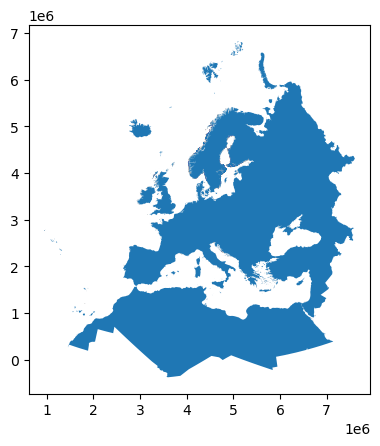

In [4]:
gdf.plot()

<Axes: >

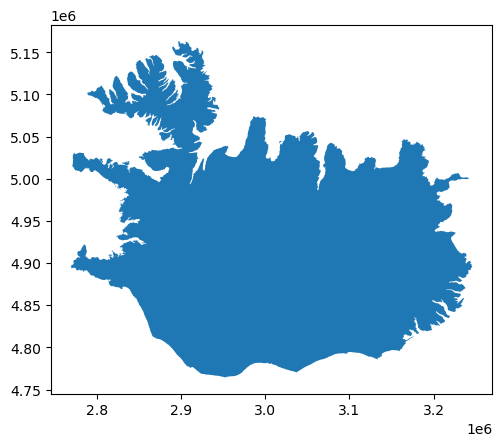

In [5]:
iceland = Point(3000000,5000000)
gdf[gdf.contains(iceland)].plot()

In [6]:
iceland_shp_path = "/home/jo/cub/research/data/coastlines/iceland_coastline.shp"
gdf[gdf.contains(iceland)].boundary.to_file(iceland_shp_path)
iceland_df = gpd.read_file(iceland_shp_path)

<Axes: >

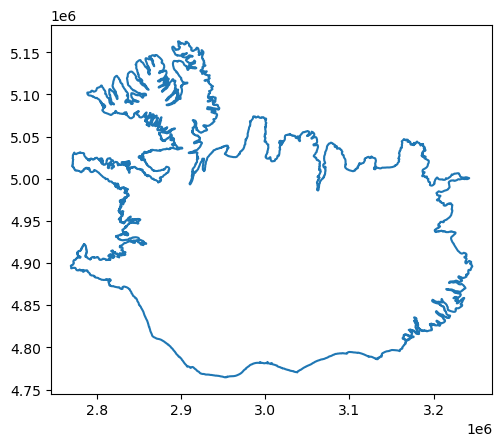

In [7]:
iceland_df.plot()

In [8]:
iceland_df

,FID,geometry
0,0,"LINESTRING (2898665.534 5162702.093, 2898951.6..."


In [7]:
source_ds = gdal.OpenEx(iceland_shp_path)

/home/jo/miniconda3/lib/python3.11/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [11]:
iceland_raster_path = "/home/jo/cub/research/data/coastlines/iceland.tif"

In [9]:
source_ds.GetGeoTransform()

(0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [ ]:
test=gdal.Rasterize(iceland_raster_path, source_ds, format='GTIFF', #layers="iceland_coastline", # outputType=gdal.GDT_Byte,
               creationOptions=["COMPRESS=DEFLATE"], noData=0, initValues=0, 
               xRes=100, yRes=-10, allTouched=True, burnValues=1)
test=None

In [13]:
il=gdal.Open(iceland_raster_path)

/home/jo/miniconda3/lib/python3.11/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [12]:
ila=il.ReadAsArray()

NameError: name 'il' is not defined

In [77]:
ila.shape

(3987, 4764)

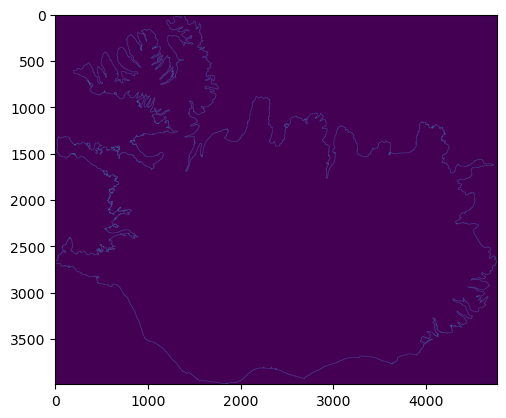

In [79]:
plt.imshow(ila)

In [78]:
ila.max()

1.0

In [15]:
il.GetProjection()

'PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4258"]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","3035"]]'